<a href="https://colab.research.google.com/github/samarthkadaba/COVID-19-Cases-Predictor/blob/master/Surname_Race_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys


from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.keras.utils import np_utils

np.set_printoptions(threshold=sys.maxsize)


In [0]:
def loadData():
  data = pd.read_csv('/content/LastNames_by_Race.csv')
  pd.set_option('display.max_rows', None)
  pd.set_option('display.max_columns', None)
  data = pd.DataFrame(data, columns = ['name', 'race'])
  x = data['name']
  y = data['race']
  return x, y

In [0]:
def to_numeric(text):
  length = len(text)
  number_string = []
  for c in text:
    number_string.append(int(ord(str(c))))
  for i in range(0, 50-len(number_string)):
    number_string.append(0)

  return number_string, length


In [0]:
def to_text(num):
  if(type(num)!=list):
    num = num.tolist()
  length = len(num)  #list length 
  i = 0
  while(i<length):
	  if(num[i]==0):
		  num.remove (num[i])
		  length = length -1  
		  continue
	  i = i+1
  text = []
  for c in num:
    if(c == 0):
      num.remove(c)
    text.append((chr(c)))
  name = ''
  for i in text:
    name+=i
  return name


In [0]:
def formatData(x,y):
  new_x = []

  for i in x:
      new_x.append(to_numeric(i.lower())[0])
      
  encoder = LabelEncoder()
  encoder.fit_transform(y)
  print(encoder.classes_)
  encoded_y = encoder.transform(y)
  dummy_y = np_utils.to_categorical(encoded_y)
  new_x = np.array(new_x)

  new_x = np.expand_dims(new_x, axis=0)

  


  
  return new_x, dummy_y, encoder

In [0]:
def create_model():
  model = Sequential()
  model.add(LSTM(512, input_shape = (1,50), activation = 'tanh', return_sequences = True))
  model.add(LSTM(256, input_shape = (1,50), activation = 'tanh', return_sequences = True))
  model.add(LSTM(128, input_shape = (1,50), activation = 'tanh', return_sequences = True))
  model.add(LSTM(64, input_shape = (1,50), activation = 'tanh'))
  model.add(Dense(32, activation  = 'sigmoid'))
  model.add(Dense(5, activation = 'softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model


['black' 'chinese' 'indian' 'latino' 'white']
(952, 1, 50)
['goel' 'wallace' 'chan' 'suarez' 'peters' 'henderson' 'suri' 'puri'
 'george' 'glover' 'zheng' 'nelson' 'lucero' 'shen' 'narayan' 'marin'
 'webb' 'tan' 'ochoa' 'kim' 'mahajan' 'cooper' 'fernandez' 'freeman'
 'thomas' 'pan' 'phillips' 'evans' 'gill' 'stewart' 'lawson' 'murray'
 'mason' 'vo' 'henry' 'sanchez' 'correa' 'nakamura' 'mao' 'cantu'
 'gilbert' 'lugo' 'lu' 'huang' 'ellis' 'mercado' 'lam' 'webb' 'escobar'
 'nava' 'su' 'rocha' 'rajan' 'subramani' 'mathew' 'garcia' 'liang' 'riley'
 'chi' 'raje' 'alston' 'bravo' 'howard' 'krishnamurthy' 'son' 'aggarwal'
 'ko' 'chen' 'bryant' 'harrison' 'andrews' 'veer' 'yeung' 'willis'
 'chauhan' 'howard' 'greene' 'james' 'dao' 'obrien' 'patel' 'mack' 'xiao'
 'torres' 'melendez' 'neal' 'ellis' 'porter' 'welch' 'rios' 'ramos' 'meza'
 'cook' 'young' 'saldana' 'tucker' 'huynh' 'castaneda' 'tom' 'castro'
 'cruz' 'fung' 'martin' 'chou' 'fox' 'mejia' 'santiago' 'coleman' 'cheung'
 'martinez' 'val

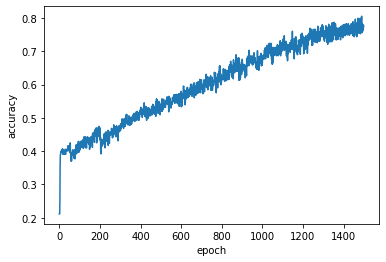

In [24]:
x, y = loadData()
x, y, encoder = formatData(x, y)
x = x.reshape(952,1,50)
print(x.shape)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, shuffle=True)
model = create_model()
test = []
for i in X_train:
  test.append(to_text(i[0]))
print(np.array(test))

history  = model.fit(X_train, y_train, epochs = 1500, batch_size = 400, verbose = 1)
y_pred = model.predict_classes(X_test, verbose = 1, batch_size = 400)
y_inv = []
for i in y_pred:
  i = np.array(i)
  i = np.expand_dims(i, axis=0)
  y_inv.append(encoder.inverse_transform(i))
x_org = []
for i in X_test:
  x_org.append(to_text(i[0]))

x_org = np.array(x_org)
y_inv = np.array(y_inv)
print(x_org, y_inv)

print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()






In [22]:
print(encoder.classes_)
lastname = input("Enter a surname: ")
lastname = to_numeric(lastname.lower())[0]
lastname = np.array(lastname)
lastname = np.expand_dims(lastname, axis = 0)
lastname = lastname.reshape(1, 1, 50)

class_pred = model.predict_classes(lastname)
class_pred = encoder.inverse_transform(class_pred)
print(class_pred)

['black' 'chinese' 'indian' 'latino' 'white']
Enter a surname: fds
['chinese']


In [0]:
test = 'test'
print(test.islower())